# Технология text-to-SQL и где она используется.

text-to-SQL - системы преобразования текстовых запросов в SQL

Что должна уметь такая система:
1. Найти в тексте сущности, соответствующие сущностям базы данных: таблицы, колонки, иногда значения.
2. Связать таблицы, сформировать фильтры.
3. Определить набор возвращаемых данных, то есть составить select list.
4. Определить порядок выборки и количество строк.
5. Выявить, помимо относительно очевидных, некие абсолютно неявные зависимости или фильтры, непрозрачные ни для кого, кроме дизайнеров схемы базы (смотри условие по полю bonus_type на картинке выше)
6. Разрешить неоднозначности при выборе сущностей. “Дай мне данные по Иванову” — следует запросить информацию по контрагенту или сотруднику с такой фамилией? “Данные по сотрудникам за февраль” — ограничить выборку по дате найма или по дате продаж? и т.д.

В каких задачах применяется данная система:
1. Семантический разбор. При семантическом разборе ответов на вопросы (QA), вопросы на естественном языке преобразуются в логические формы, которые затем выполняются на графе знаний. Другие работы по семантическому анализу сосредоточены на изучении синтаксических анализаторов, не полагаясь на аннотированные логические формы, используя разговорный язык.
2. Интерфейс на естественном языке для баз данных. Одной из выдающихся работ в области интерфейсов естественного языка является PRECISE, которая переводит вопросы в SQL-запросы и идентифицирует вопросы, в которых он не уверен. Giordani & Moschitti (2012) переводят вопросы в SQL, сначала генерируя запросы-кандидаты из грамматики, а затем ранжируя их с помощью древовидных ядер. Оба этих подхода основаны на высококачественной грамматике и не подходят для задач, требующих обобщения на новую схему. Айер и другие (2017) также переводят на SQL, но с моделью Seq2Seq, которая еще больше улучшается благодаря обратной связи с человеком. Seq2SQL превосходит Seq2Seq и использует подкрепление обучение вместо обратной связи с человеком во время обучения. 

Начнём с примеров продуктов, которые решают вторую задач, так как такие примеры существенно менее популярны. 

# Примеры продуктов второго типа задачи:

1. [CAT](https://arxiv.org/pdf/2203.14144.pdf): Synthesizing Data-Aware Conversational Agents for Transactional Databases.

Базы данных для OLTP часто являются основой для таких приложений, как бронирование гостиничных номеров или билетов в кино. Однако,
разработка диалогового агента (т. е. интерфейса, подобного чат-боту)
чтобы позволить конечным пользователям взаимодействовать с приложением, используя естественные язык требует как огромных объемов обучающих данных, так и НЛП экспертизы. CAT же можно использовать для легкого создания
диалоговые агенты для транзакционных баз данных. Основная идея
заключается в том, что для данной базы данных OLTP CAT использует слабый контроль для синтеза необходимых обучающих данных для обучения современного
разговорного агента, позволяющего пользователям взаимодействовать с
базой данных OLTP. Кроме того, CAT обеспечивает готовую интеграцию
полученного агента с базой данных. В качестве основного отличия от
существующих диалоговых агентов, агенты синтезированные CAT, осведомлены о данных. Это означает, что агент решает, какую информацию следует
запрашиваться у пользователя на основе текущих распределений данных
в базе, что обычно приводит к значительно более эффективному
запросу по сравнению с агентами, не осведомленных о данных.

Например, кинотеатр может иметь базу данных клиентов, хранящую бронирование билетов на кинопоказы. Типичная транзакция, доступ к которой осуществляется с помощью разговорного агента - это процесс бронирования билетов, в котором пользователи должны указать свой customer_id, screening_id и количество билетов. Чтобы интегрировать такую задачу в типичную существующую диалоговую систему, ориентированную на задачи, нам сначала пришлось бы смоделировать задачи, поддерживаемые разговорным агентом (например, купить билет), вместе со слотами, то есть необходимыми атрибутами для задачи (например, screening_id и customer_id). Однако вся эта информация, как правило, уже доступна в
данная база данных и набор ее транзакций (например, реализованных в виде
хранимых процедур или определяемых пользователем функций). Таким образом, основная идея CAT заключается в автоматическом извлечении и использовании этой информации вместо того, чтобы просить пользователя указать ее вручную.

2. [DBPal](https://arxiv.org/pdf/1909.06182.pdf): Weak Supervision for Learning a Natural Language Interface to Databases

DBPal - новая система для перевода высказываний на естественном языке в операторы SQL с использованием модели нейронного машинного перевода. В то время как другие недавние подходы используют нейронный машинный перевод для реализации интерфейса естественного языка к базам данных (NLIDB), существующие методы основаны на контролируемом обучении с использованием обучающих
данных, отобранных вручную, что приводит к значительным накладным расходам на поддержку каждой новой схемы базы данных. Чтобы избежать этой проблемы,
DBPal реализует новый конвейер обучения, основанный на слабом
контроле, который синтезирует все обучающие данные из заданной
схемы базы данных. Основная идея слабого надзора заключается в использовании различных эвристик и существующих наборов данных для автоматического создания больших (и потенциально зашумленных) обучающих наборов данных вместо их ручной обработки. Целевая аудитория этого продукта схожа с предыдущим проектом, они решают одну проблему. 

# Примеры продуктов первого типа задачи

1. Самым распространённым продуктом, который решает задачу первого типа, является Google Search и его аналоги. Они, получая некий запрос, например: "В каком году умер Майкл Джексон?", стараются сразу предоставить интересующую информацию, а не выдвать список статей, найденных по ключевым словам.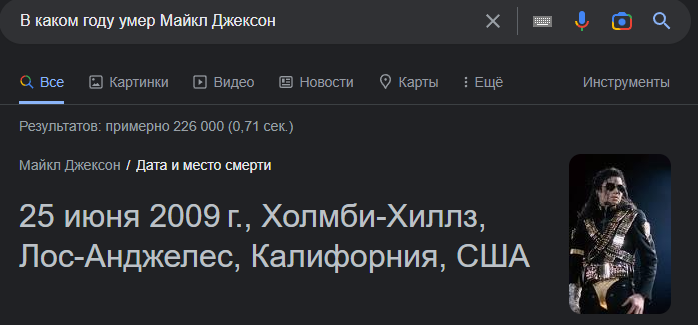

Данные продукты нацелены на то, чтобы уменьшить количество шагов пользователя, которое ему нужно выполнить, для получаения информации, вследствии чего экономится его время. 



2. OpenStreetMaps, Google Maps, Yandex Maps, 2GIS и т.д.(Геокодинг) Задача данных продуктов, предоставить пользователю информацю об объекте по его запросу. Это может быть задача геокодинга, где сервис должен выдать координаты по запросу типа: "ул. Тургенева 4, Екатеренбург" или же задача обратного геокодинга, где нужно наоборот, по координатам вернуть информацию о том, что это за страна, город, улица и т.д. Нам больше интересен обычный геокодинг, запросы в нём строятся текстом, а сервис, преобразуя этот запрос в SQL, ищет объект в базе данных по этим критериям. Задачей может являтся определение координат страны, населённого пункта, улица, номера дома или даже района. Рассмотрим семантический разбор на примере OSM: Они предоставляют бесплатное API, с помощью которого можно формировать запрос в произвольной форме, например - по запросу "https://nominatim.openstreetmap.org/search?q=Третьяковская%20галерея&format=json", в котором q - означает текстовое описание места, а format - формат выдачи результата, мы получим -

 [{"place_id":307951728,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"relation","osm_id":1907261,"boundingbox":["55.7410902","55.7416342","37.6196019","37.6207612"],"lat":"55.7413613","lon":"37.6202195782772","display_name":"Третьяковская галерея, 10, Лаврушинский переулок, район Якиманка, Москва, Центральный федеральный округ, 119017, Россия","class":"tourism","type":"museum","importance":0.7217607468931659,"icon":"https://nominatim.openstreetmap.org/ui/mapicons/tourist_museum.p.20.png"}]
 
  Как видим, OSM прекрасно обработала наш запрос, так же мы можем задать адрес, а не название заведения, например - по запросу https://nominatim.openstreetmap.org/search?q=Лаврушинский%20переулок%2010&format=json&limit=3, мы получим схожий результат -

 [{"place_id":307951728,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"relation","osm_id":1907261,"boundingbox":["55.7410902","55.7416342","37.6196019","37.6207612"],"lat":"55.7413613","lon":"37.6202195782772","display_name":"Третьяковская галерея, 10, Лаврушинский переулок, район Якиманка, Москва, Центральный федеральный округ, 119017, Россия","class":"tourism","type":"museum","importance":0.8317607468931659,"icon":"https://nominatim.openstreetmap.org/ui/mapicons/tourist_museum.p.20.png"},{"place_id":58890138,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"node","osm_id":5443883611,"boundingbox":["55.7414676","55.7415676","37.6202628","37.6203628"],"lat":"55.7415176","lon":"37.6203128","display_name":"10, Лаврушинский переулок, район Якиманка, Москва, Центральный федеральный округ, 119017, Россия","class":"shop","type":"gift","importance":0.31001},{"place_id":58791946,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"node","osm_id":5443884021,"boundingbox":["55.7415395","55.7416395","37.6201634","37.6202634"],"lat":"55.7415895","lon":"37.6202134","display_name":"10, Лаврушинский переулок, район Якиманка, Москва, Центральный федеральный округ, 119017, Россия","class":"shop","type":"books","importance":0.31001}]

 Как видим, сервис нашёл несколько объектов, всё потому, что наш запрос стал менее строгим и соответственно вариантов ответа стало больше, лимит был установлен специально, так как без него, результатов в разы больше.


Были рассмотрены два наиболее популярных направления text-to-SQL, как видно, эта технология уже широко распространена, хотя среднестатистическому пользователю это не так заметно. Она упрощает нам некоторые задачи уже сейчас, такие как геокодинг и поиск информации в интернете, но что-то более сложное, как реализации интерфейса на естественном языке для баз данных пока не нашли широкого распространения, из-за более строгих условий работы(Если нам вместо даты смерти Майкла Джесона бразуер выдаст дату его рождения, это не так страшно, как например взятие ещё одного кредита, вместо закрытия предыдущего, в случае ошибки диалогового агента). Но нет сомнения, что в ближайшем будущем и данная технология обретёт большую популярность.